In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset taxis
taxis = sns.load_dataset('taxis')
sns.set_theme()

In [ ]:
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


1. Buatlah line plot menggunakan dataset taxis yang menunjukkan perkembangan total biaya (fare) harian sepanjang waktu.

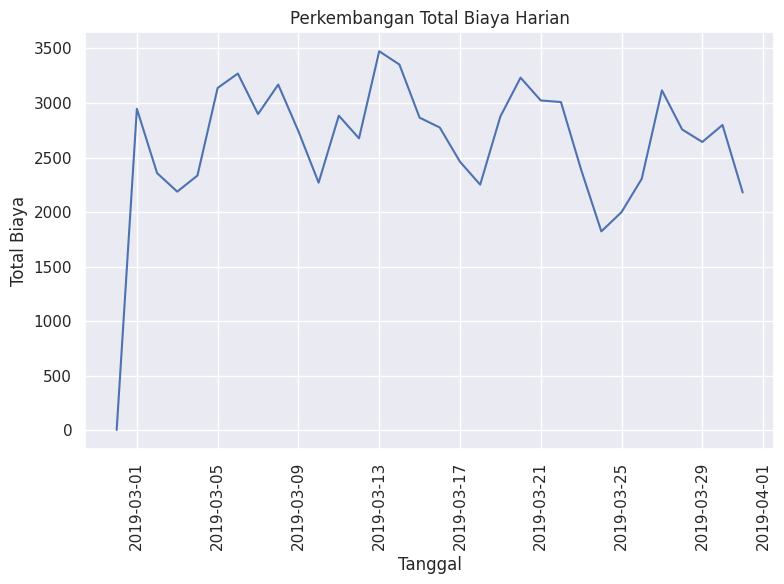

In [ ]:
#memasukkan data tersebut ke dalam plot dengan menggunakan .lineplot
taxis['pickup'] = pd.to_datetime(taxis['pickup'])

taxis.set_index('pickup', inplace=True)

daily_fare = taxis['fare'].resample('D').sum().reset_index()

sns.set_theme()
plt.figure(figsize=(8, 6))
sns.lineplot(data=daily_fare, x='pickup', y='fare')

plt.title('Perkembangan Total Biaya Harian')
plt.xlabel('Tanggal')
plt.ylabel('Total Biaya')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

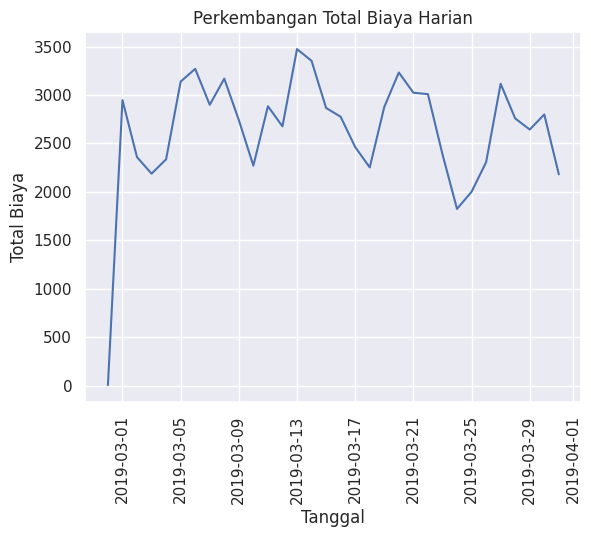

2. Gunakan dataset taxis untuk membuat bar plot yang menunjukkan jumlah perjalanan (transaksi) per jenis pembayaran (payment type).

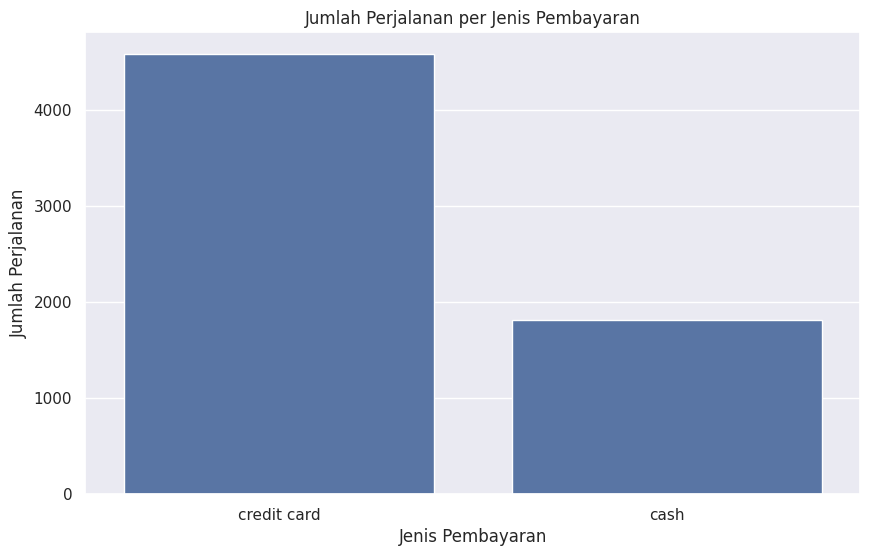

In [ ]:
payment_counts = taxis['payment'].value_counts().reset_index()
payment_counts.columns = ['payment', 'count']

sns.set_theme()
plt.figure(figsize=(10, 6))
sns.barplot(data=payment_counts, x='payment', y='count')

plt.title('Jumlah Perjalanan per Jenis Pembayaran')
plt.xlabel('Jenis Pembayaran')
plt.ylabel('Jumlah Perjalanan')

# Show the plot
plt.show()

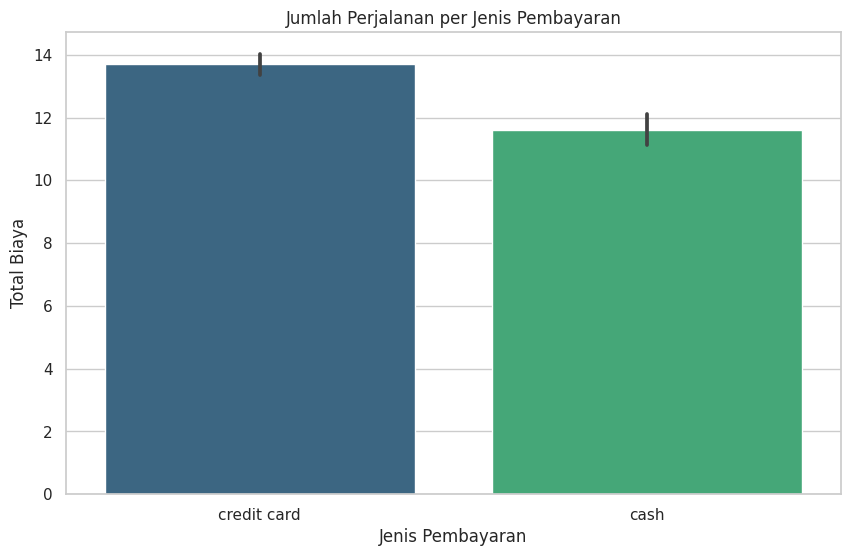

3. Dengan dataset taxis, buat scatter plot yang menunjukkan hubungan antara jarak perjalanan dan total biaya perjalanan. buat 2 plot terhadap cara pembayaran. Group data berdasarkan tip yang di berikan setelah dilakukan binning

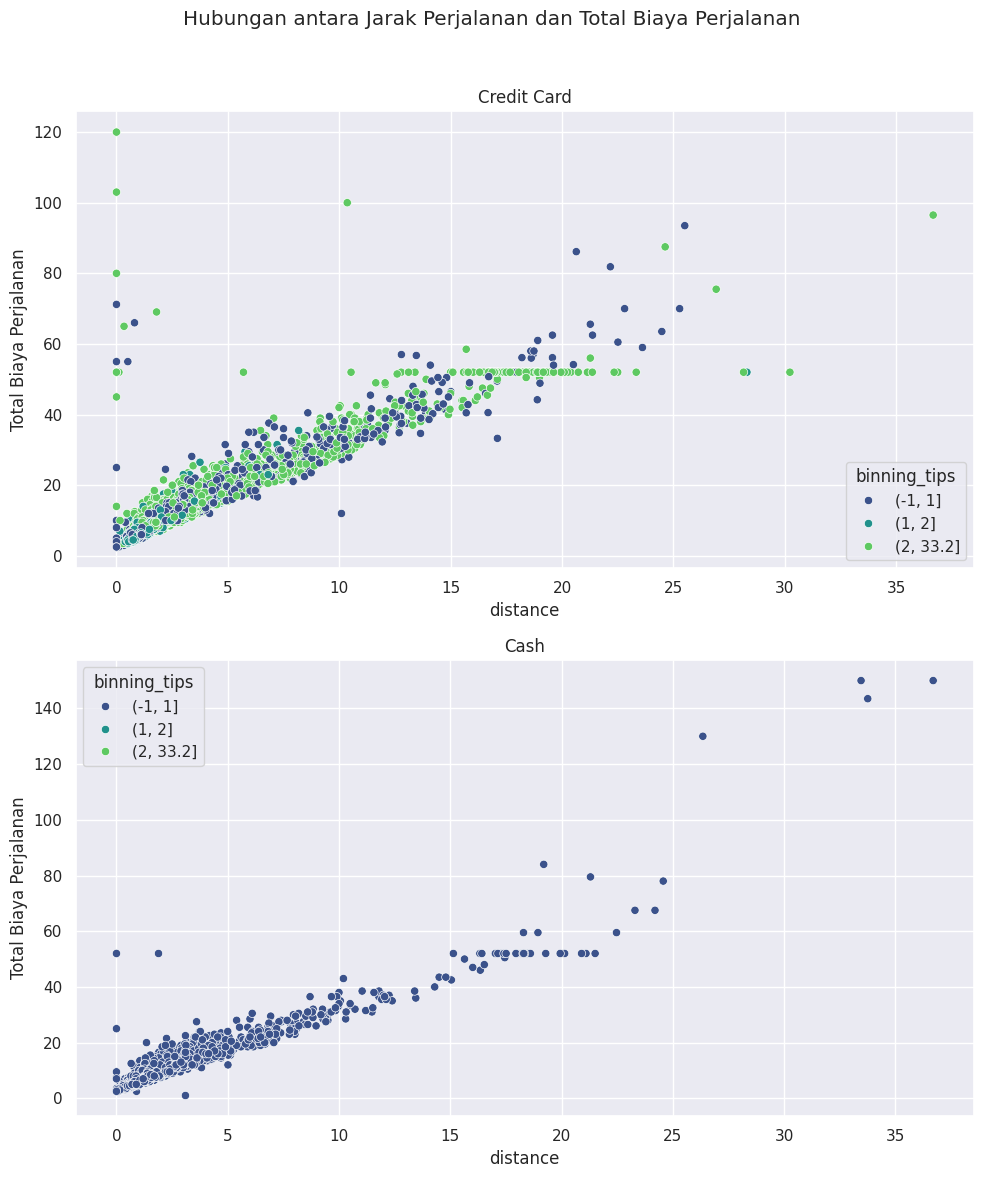

In [ ]:
bins = [-1, 1, 2, taxis['tip'].max()]
labels = ['(-1, 1]', '(1, 2]', '(2, ' + str(taxis['tip'].max()) + ']']
taxis['binning_tips'] = pd.cut(taxis['tip'], bins=bins, labels=labels)

sns.set_theme()
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

subset_credit = taxis[taxis['payment'] == 'credit card']
sns.scatterplot(data=subset_credit, x='distance', y='fare', hue='binning_tips', ax=axes[0], palette='viridis')
axes[0].set_title('Credit Card')
axes[0].set_xlabel('distance')
axes[0].set_ylabel('Total Biaya Perjalanan')

subset_cash = taxis[taxis['payment'] == 'cash']
sns.scatterplot(data=subset_cash, x='distance', y='fare', hue='binning_tips', ax=axes[1], palette='viridis')
axes[1].set_title('Cash')
axes[1].set_xlabel('distance')
axes[1].set_ylabel('Total Biaya Perjalanan')

plt.suptitle('Hubungan antara Jarak Perjalanan dan Total Biaya Perjalanan')

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

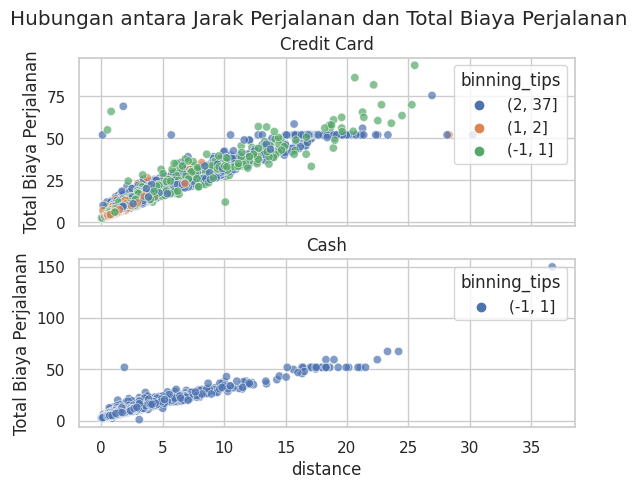

4. Manfaatkan data wrangling untuk membersihkan dataset dari nilai-nilai yang tidak valid pada kolom 'distance' dan 'fare'. Selanjutnya, buat histogram yang menunjukkan distribusi jarak perjalanan.

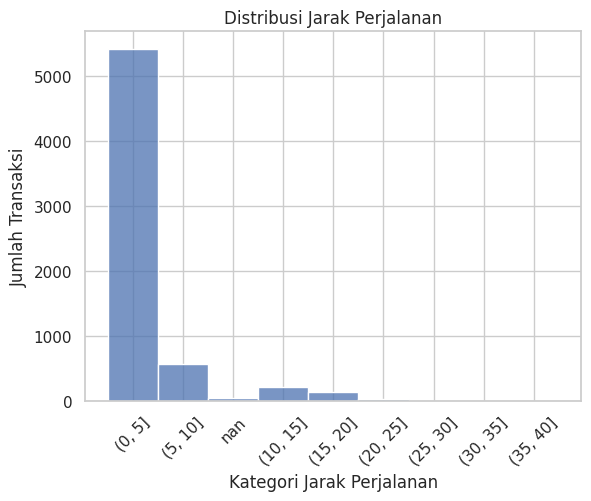